<a href="https://colab.research.google.com/github/singh00in/AIML/blob/main/Hackathon/Hackathon_Solution_Code_Yashpal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YashTeam Solution Code

**MY Best Model is **

Multiple Linear Regression - Turnover vs All Independent variable(Catogrical+ Numerical)
**RMSE=	1.102695e+07	**


Installing and importing necessary libraries

In [ ]:
!pip install pandas==2.2.2 numpy==2.0.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 -q

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# to visualize data
import seaborn as sns
# to split the data into train and test sets
from sklearn.model_selection import train_test_split
# to build a linear regression model
from sklearn.linear_model import LinearRegression
# to check a regression model's performance
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

**Loading the Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Restra full Data **

# Loading the Training Data and using the Training Data to build the Model

In [154]:
df_train = pd.read_csv('/content/drive/MyDrive/PG-AIML/Hackathon/Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


Making copy of the dataset

In [155]:
df_train_copy = df_train.copy()
df_train_copy.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


checking the shape of the dataset

In [5]:
df_train_copy.shape

(3493, 34)

checking info of the dataset

In [6]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

checking the duplicate value

In [ ]:
df_train_copy.duplicated().sum()

np.int64(0)

In [ ]:
## Checking for the null values
df_train_copy.shape

(3493, 34)

Getting Statsitical value

In [ ]:
df_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,6.174700e+04,1.008487e+03,60001.0,60874.0,61747.00,6.262000e+04,6.349300e+04
Annual Turnover,3493.0,3.072571e+07,2.165125e+07,3500000.0,18000000.0,30000000.00,3.700000e+07,4.000000e+08
Facebook Popularity Quotient,3394.0,7.793872e+01,9.829169e+00,43.0,72.0,79.00,8.574500e+01,9.776000e+01
Instagram Popularity Quotient,3437.0,7.440468e+01,1.094033e+01,40.0,66.0,74.05,8.240000e+01,9.870000e+01
Fire Audit,3493.0,7.887203e-01,4.082748e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Liquor License Obtained,3493.0,9.882622e-01,1.077187e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Situated in a Multi Complex,3493.0,8.081878e-01,3.937825e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Dedicated Parking,3493.0,8.018895e-01,3.986329e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Open Sitting Available,3493.0,8.001718e-01,3.999284e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Resturant Tier,3444.0,1.926539e+00,2.609297e-01,1.0,2.0,2.00,2.000000e+00,2.000000e+00


**Checking Missing data**

In [ ]:
df_train_copy.isna().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


There are column where missing data are there:
Facebook Popularity Quotient
Instagram Popularity Quotient
Resturant Tier
Overall Restaurant Rating
Live Music Rating
Comedy Gigs Rating
Value Deals Rating
Live Sports Rating
Ambience

Getting all record where Facebook Popularity Quotient	 is missing

In [156]:
## Importing Simple Imputer to treat the null values
from sklearn.impute import SimpleImputer

In [157]:
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation
SI = SimpleImputer(strategy='mean')

In [158]:
## Fitting the Simple Imputer function to get the mean of the variable

SI.fit(df_train_copy[['Instagram Popularity Quotient']])
print(SI.statistics_)

[74.40468432]


In [159]:
## Transforming the variable --> Imputing the variable with its mean

IPQ = SI.transform(df_train_copy[['Instagram Popularity Quotient']])
IPQ

array([[95.8],
       [85. ],
       [68.2],
       ...,
       [86.8],
       [86. ],
       [67. ]])

Imputing all missing value for Instagram Popularity Quotient with its mean value

In [160]:
## getting meanvalue of the Instagram Popularity Quotient and and filling it for the missing value
df_train_copy[['Instagram Popularity Quotient']] = SI.transform(df_train_copy[['Instagram Popularity Quotient']])
df_train_copy.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


Imputing Facebook popularity quoitent with the mean value

In [161]:
SI1=SimpleImputer(strategy='mean')
SI1.fit(df_train_copy[['Facebook Popularity Quotient']])
print(SI1.statistics_)

[77.93871538]


In [162]:
df_train_copy[['Facebook Popularity Quotient']] = SI1.transform(df_train_copy[['Facebook Popularity Quotient']])

Imputing Restraunt tier with the mean value

In [163]:
si_rest_tier=SimpleImputer(strategy='mean')
si_rest_tier.fit(df_train_copy[['Resturant Tier']])
print(si_rest_tier.statistics_)

[1.92653891]


In [164]:
df_train_copy[['Resturant Tier']] = si_rest_tier.transform(df_train_copy[['Resturant Tier']])

imputing Overall Restaurant Rating

In [165]:
si_rest_tier.fit(df_train_copy[['Overall Restaurant Rating']])
print(si_rest_tier.statistics_)

[8.479427]


In [166]:
df_train_copy[['Overall Restaurant Rating']] = si_rest_tier.transform(df_train_copy[['Overall Restaurant Rating']])

Imputing Live music rating with mean value

In [167]:
si_rest_tier.fit(df_train_copy[['Live Music Rating']])
print(si_rest_tier.statistics_)

[4.01282991]


In [168]:
df_train_copy[['Live Music Rating']] = si_rest_tier.transform(df_train_copy[['Live Music Rating']])

As max Live Sports Rating is null and not adding any value hence dropping this particular column

In [169]:
df_train_copy.drop('Live Sports Rating',axis=1,inplace=True)

imputing Comedy Gigs Rating	 with its mean value

In [170]:
si_rest_tier.fit(df_train_copy[['Comedy Gigs Rating']])
print(si_rest_tier.statistics_)

[2.93267327]


In [171]:
df_train_copy[['Comedy Gigs Rating']]=si_rest_tier.transform(df_train_copy[['Comedy Gigs Rating']])

imputing the mean value of the Value Deals Rating

In [172]:
si_rest_tier.fit(df_train_copy[['Value Deals Rating']])
print(si_rest_tier.statistics_)

[3.65521628]


In [173]:
df_train_copy[['Value Deals Rating']]=si_rest_tier.transform(df_train_copy[['Value Deals Rating']])

Imputing the mean value for the Ambience

In [174]:
si_rest_tier.fit(df_train_copy[['Ambience']])
print(si_rest_tier.statistics_)

[6.42301038]


In [175]:
df_train_copy[['Ambience']]=si_rest_tier.transform(df_train_copy[['Ambience']])

In [27]:
df_train_copy.shape

(3493, 33)

In [176]:
df_train_copy.isna().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endorsed By,0
Instagram Popularity Quotient,0
Fire Audit,0


In [177]:
#As Registration number is just ID hence dropping it
df_train_copy.drop('Registration Number',axis=1,inplace=True)

**Exploratrory Data Analysis**

**Univariate Analysis**

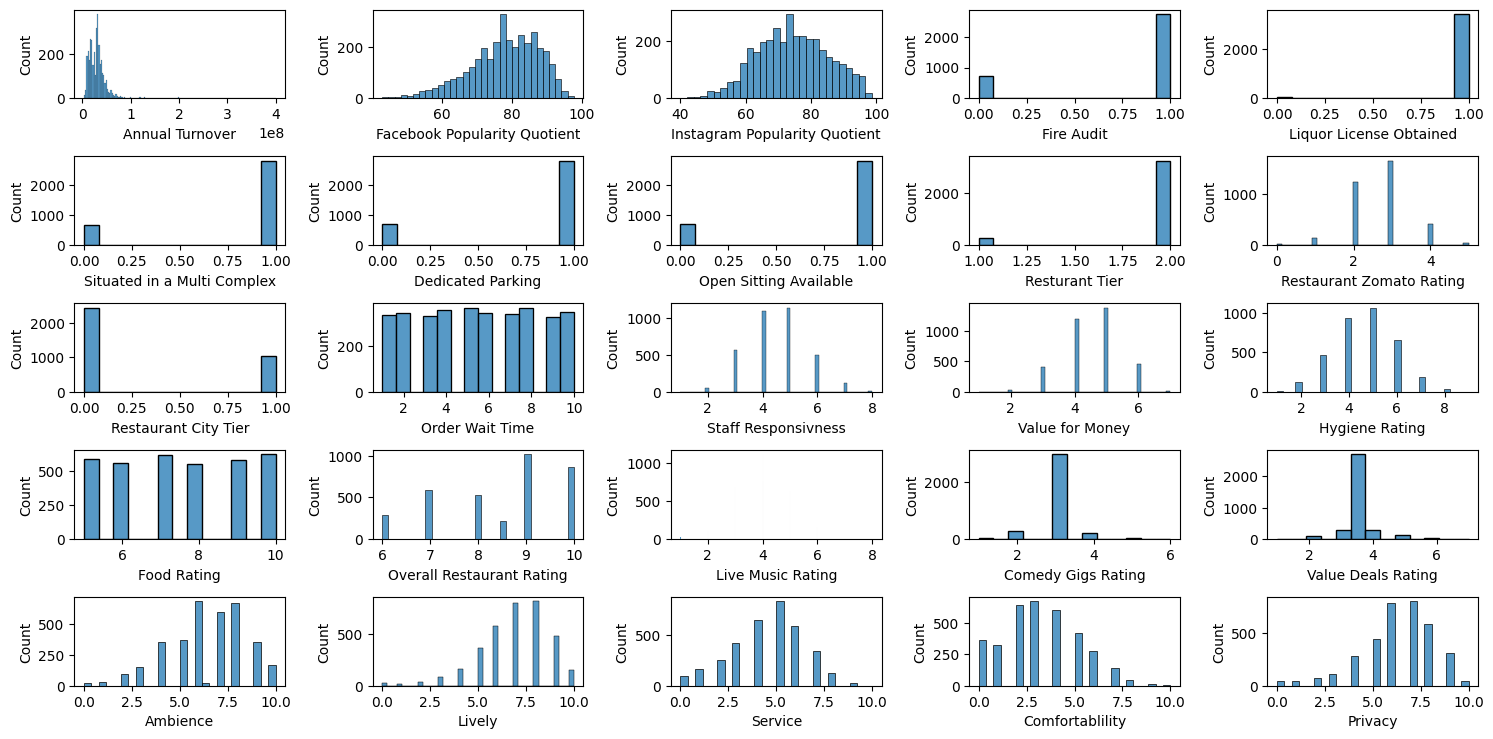

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = df_train_copy.select_dtypes(include=['number']).columns.tolist()
#print(features)
# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(7, 5, i+1)    # assign a subplot in the main plot
    sns.histplot(data=df_train_copy, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

## Key Insights
Most restaurants in the dataset have high ratings for Food, Hygiene, and Overall Quality, with a clear positive skew.

Annual Turnover is heavily skewed towards lower values, suggesting a few restaurants have exceptionally high revenue while most have modest earnings.

Fire Audit and Liquor License are mostly binary, indicating that nearly all restaurants either have these or not, which may be a simple regulatory check.

Order Wait Time is bimodal, with peaks at short and long wait times, indicating two distinct groups of restaurants based on their service speed.

Features like Live Music Rating, Comedy Gigs Rating, and Privacy show a wide distribution of scores, suggesting these are more variable aspects of a restaurant's appeal.




**Creating Box Plot**

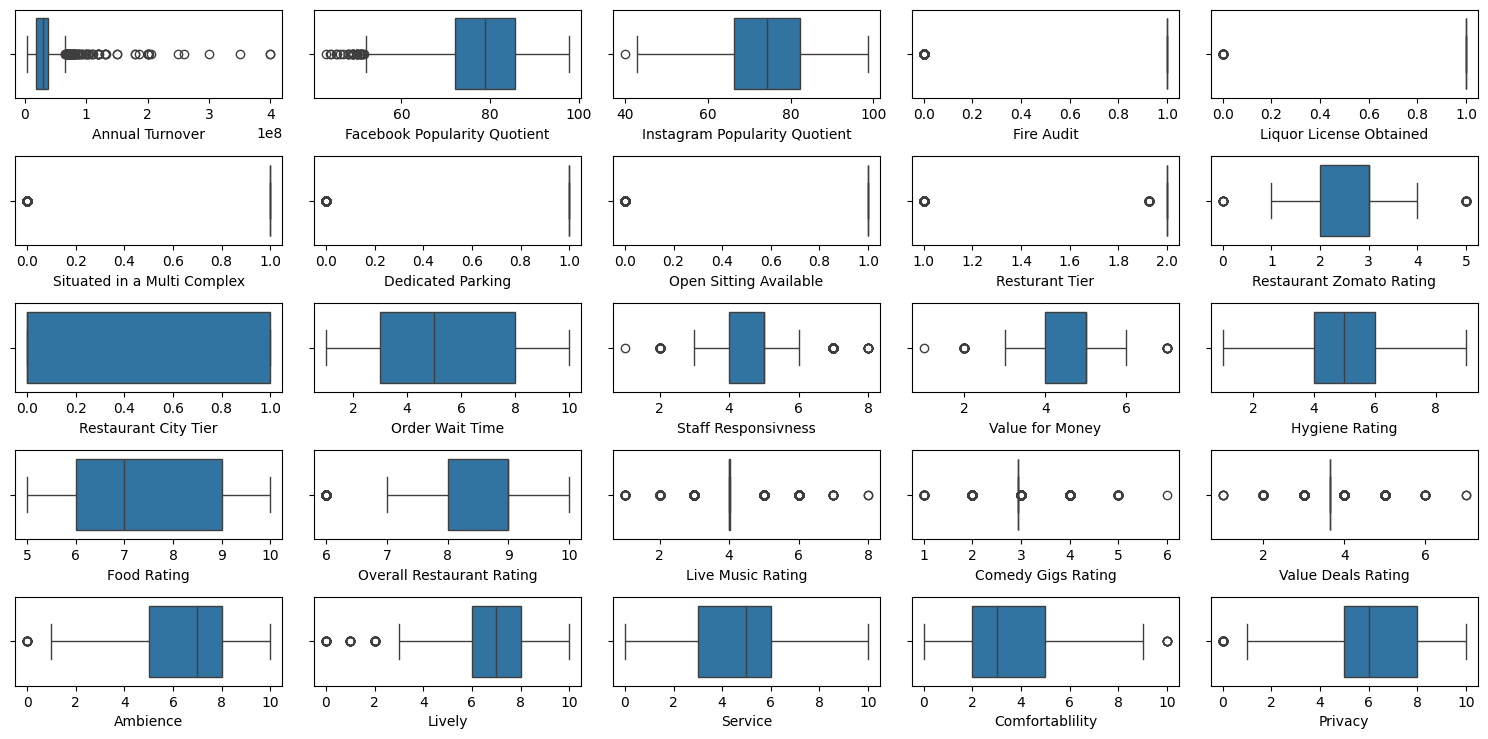

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = df_train_copy.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(7, 5, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=df_train_copy, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

## **Key Insights**
Annual Turnover is heavily right-skewed with a large number of outliers, indicating that a small number of restaurants have significantly higher revenue than the majority.

Most rating-based features like Food Rating and Hygiene Rating have a high median and interquartile range, suggesting that most restaurants are well-regarded in these areas.

Binary features such as Fire Audit and Liquor License Obtained show little to no variance, with most data points clustered at one value, indicating a common characteristic among the restaurants.

The Restaurant Zomato Rating and Restaurant Tier have a broad interquartile range, suggesting a wide distribution of ratings and tiers across the dataset.

Features like Live Music Rating and Comedy Gigs Rating have medians around 0 and a wide range of outliers, indicating that these are not common features of the restaurants in this dataset.




**Creating Bar plot**

In [ ]:
# defining the figure size
plt.figure(figsize=(200, 100))

# defining the list of categorical features to plot
features = df_train_copy.select_dtypes(exclude=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)    # assign a subplot in the main plot
    sns.countplot(data=df_train_copy, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

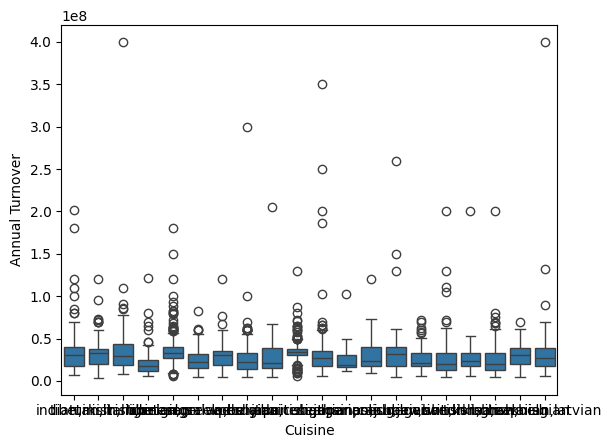

In [212]:
sns.boxplot(data=df_train_copy, y='Annual Turnover', x='Cuisine');

**Heat Map**

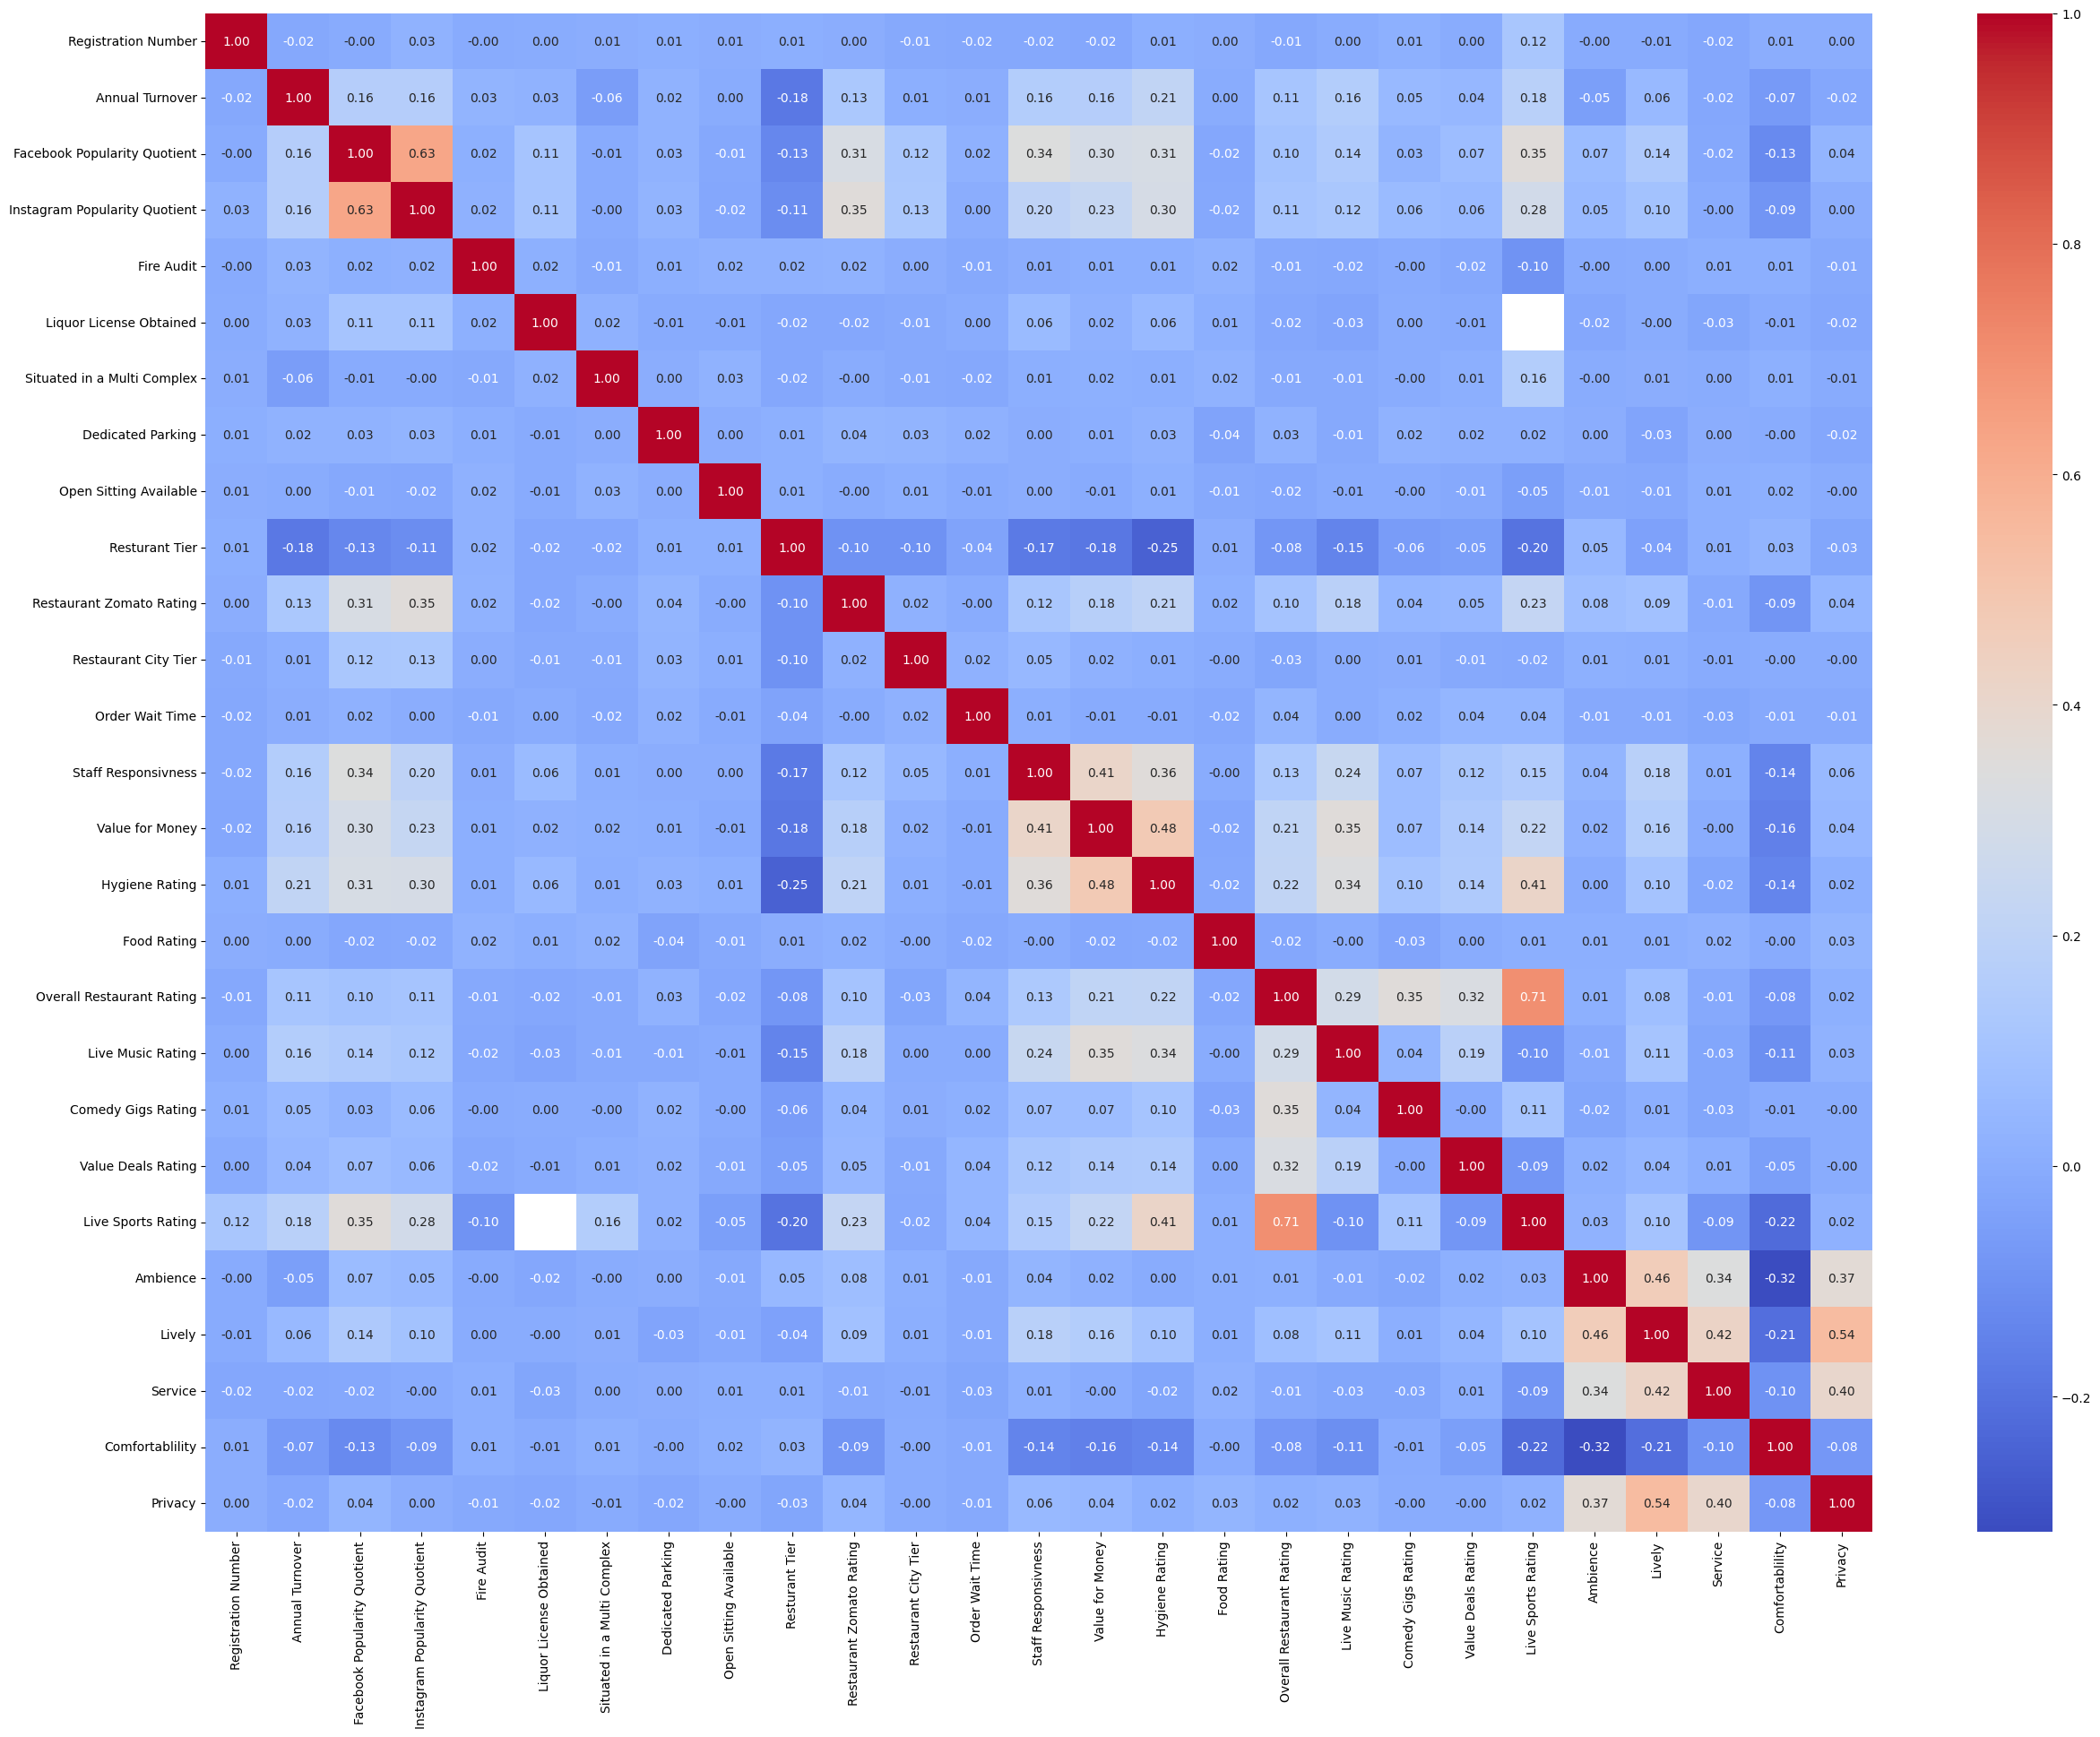

In [ ]:
# defining the figure size
plt.figure(figsize=(30, 22))

# plotting the correlation heatmap
sns.heatmap(df_train_copy.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

**Key Insights**
The strongest positive correlation is between Hygiene Rating and Food Rating, followed by Overall Restaurant Rating, suggesting these ratings are highly interconnected and likely influence each other.

Annual Turnover has very weak correlations with all other variables, with the highest positive correlation being Hygiene Rating (0.21) and the highest negative being Restaurant Zomato Rating (-0.13).

Based on the heatmap, the best independent variable to predict annual turnover is Hygiene Rating, as it has the highest positive correlation coefficient (0.21) among all features.

Features like Facebook Popularity Quotient and Instagram Popularity Quotient have a moderate positive correlation with each other (0.68), indicating that a restaurant's social media popularity is consistent across platforms.

There's a strong positive correlation among many of the rating variables, particularly between Lively, Ambiance, and Service, suggesting restaurants rated well on one tend to be rated well on the others.

**Bivariate Analysis**
Based on the HeatMap ploting pair plot for most required pair plot
as Facebook Popularity Quotient and Istagram  Popularity Quotient highly corrlated hense only using Facebook  Popularity Quotient

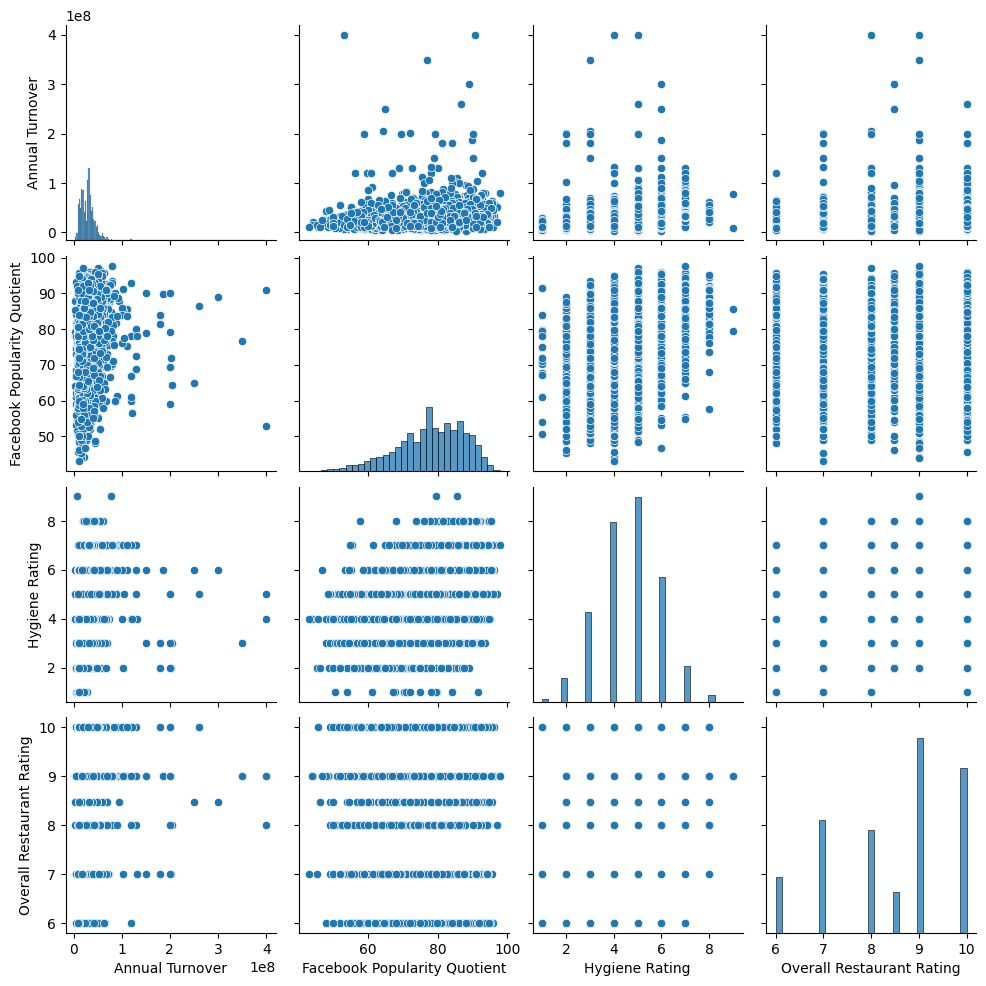

In [ ]:
sns.pairplot(df_train_copy[['Annual Turnover','Facebook Popularity Quotient','Hygiene Rating','Overall Restaurant Rating']])

**Key Insights**
Annual Turnover is highly skewed, with most restaurants having low turnover and only a few outliers generating very high revenue.

Among the variables shown, Facebook Popularity Quotient has the most visible positive correlation with Annual Turnover, making it the best predictor in this set.

There is a clear positive correlation between Hygiene Rating and Overall Restaurant Rating, suggesting that cleanliness significantly influences a restaurant's overall score.

Most restaurants are rated highly, as shown by the distributions for Hygiene Rating and Overall Restaurant Rating, which are concentrated in the upper end of the scale.

The relationships between Annual Turnover and the rating variables are weak and scattered, indicating that high ratings alone do not guarantee a high turnover.

**Model Building **
Based on above finding creating **Simple Linear regression** with most independent variables

In [179]:
## Declaring the Linear Regression function

LR = LinearRegression()

After looking the heatmap these independent variables ( **Facebook Popularity Quotient,Hygiene Rating ,Overall Restaurant Rating **) are the best fit for the simple linear regresion

as due to the Multicollinearity: Be careful not to include independent variables that are highly correlated with each other. For example, **Facebook Popularity Quotient and Instagram Popularity Quotient** are highly correlated (0.83), as are Overall** Restaurant Rating and other ratings like Hygiene Rating (0.42) and Food Rating (0.38).** Including both highly correlated variables can make the model unstable and difficult to interpret. You might want to choose just one of these or consider creating a composite variable.

In [47]:
# Model for Facebook Popularity Quotient
X_train_fpq=df_train_copy[['Facebook Popularity Quotient']]
y_train=df_train[['Annual Turnover']]
model_fpq=LR.fit(X_train_fpq,y_train)

In [48]:
#checking the score of the model_fpq
model_fpq.score(X_train_fpq,y_train)

0.026429952241711296

In [49]:
#printing the intercept and cofficent
print(
  "Intercept:", model_fpq.intercept_,
  "cofficent:", model_fpq.coef_,
)

Intercept: [2410959.07341819] cofficent: [[363295.04981545]]


In [52]:
 #Model for Instagram Popularity Quotient
X_train_Ipq=df_train_copy[['Instagram Popularity Quotient']]
y_train=df_train[['Annual Turnover']]
model_Ipq=LR.fit(X_train_Ipq,y_train)

In [53]:
model_Ipq.score(X_train_Ipq,y_train)

0.026482712263984687

Printing Linear Regression equastion for the Facebook Popularity Quotient

In [34]:
# printing the linear regression equation
print(
    "annual turnover =",
     "(", model_fpq.coef_[0], ")", "*", "Facebook Popularity Quotient",
    "+", model_fpq.intercept_,
)

annual turnover = ( [363295.04981545] ) * Facebook Popularity Quotient + [2410959.07341819]


In [54]:
# Model for Hygiene Rating
X_train_hyr=df_train_copy[['Hygiene Rating']]
y_train=df_train[['Annual Turnover']]
model_hyr=LR.fit(X_train_hyr,y_train)

In [46]:
#checking the score for model hygine rating
model_hyr.score(X_train_hyr,y_train)

0.045740033161403626

In [37]:
# printing the linear regression equation
print(
    "annual turnover =",
     "(", model_hyr.coef_[0], ")", "*", "Hygiene Rating",
    "+", model_hyr.intercept_,
)

annual turnover = ( [3676420.78626095] ) * Hygiene Rating + [13586620.07344021]


model for Overall Restaurant Rating

In [38]:
# Model for Overall Restaurant Rating
X_train_orr=df_train_copy[['Overall Restaurant Rating']]
y_train=df_train[['Annual Turnover']]
model_orr=LR.fit(X_train_orr,y_train)

In [40]:
#checking the score forOverall Restaurant Rating
model_orr.score(X_train_orr,y_train)

0.012792477714576922

In [39]:
# printing the linear regression equation
print(
    "annual turnover =",
     "(", model_orr.coef_[0], ")", "*", "Overall Restaurant Rating",
    "+", model_orr.intercept_,
)

annual turnover = ( [1962922.40034366] ) * Overall Restaurant Rating + [14081251.35182079]


**Handling Catogrical Data **



In [265]:
X_train_final=df_train_copy
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant Location            3493 non-null   object 
 4   Opening Day of Restaurant      3493 non-null   object 
 5   Facebook Popularity Quotient   3493 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3493 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-null   i

In [41]:
X_train_final.head()

,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.300000,Not Specific,95.8,1,1,...,7,10.0,4.00000,2.932673,3.655216,8.00000,8,6,6,6
1,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.0,1,1,...,8,9.0,4.01283,4.000000,3.655216,5.00000,7,7,3,8
2,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.2,1,1,...,7,8.0,3.00000,2.932673,3.655216,7.00000,10,5,2,8
3,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.6,0,1,...,8,9.0,6.00000,2.932673,3.655216,7.00000,7,4,3,5
4,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.8,1,1,...,8,6.0,4.01283,2.000000,3.655216,6.42301,6,2,4,6


In [232]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant Location            3493 non-null   object 
 4   Opening Day of Restaurant      3493 non-null   object 
 5   Facebook Popularity Quotient   3493 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3493 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-null   i

In [74]:
# dropping the  Annual turnover
X_train_final.drop('Annual Turnover',axis=1,inplace=True)

In [76]:
#dropping the Instagram Popularity Quotient
X_train_final.drop('Instagram Popularity Quotient',axis=1,inplace=True)

In [77]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cuisine                       3493 non-null   object 
 1   City                          3493 non-null   object 
 2   Restaurant Location           3493 non-null   object 
 3   Opening Day of Restaurant     3493 non-null   object 
 4   Facebook Popularity Quotient  3493 non-null   float64
 5   Endorsed By                   3493 non-null   object 
 6   Fire Audit                    3493 non-null   int64  
 7   Liquor License Obtained       3493 non-null   int64  
 8   Situated in a Multi Complex   3493 non-null   int64  
 9   Dedicated Parking             3493 non-null   int64  
 10  Open Sitting Available        3493 non-null   int64  
 11  Resturant Tier                3493 non-null   float64
 12  Restaurant Type               3493 non-null   object 
 13  Res

In [79]:
y_train=df_train['Annual Turnover']

Loading Test Data

In [184]:
df_test = pd.read_csv('/content/drive/MyDrive/PG-AIML/Hackathon/Test_dataset.csv')


In [140]:
df_test_copy=df_test
df_test_copy.head()


,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [142]:
#dropping regestration number and Live sport rating Instagram Popularity Quotient
df_test_copy.drop('Registration Number',axis=1,inplace=True)
df_test_copy.drop('Live Sports Rating',axis=1,inplace=True)
#df_test_copy.drop('Instagram Popularity Quotient',axis=1,inplace=True)


In [143]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cuisine                        500 non-null    object 
 1   City                           500 non-null    object 
 2   Restaurant Location            500 non-null    object 
 3   Opening Day of Restaurant      500 non-null    object 
 4   Facebook Popularity Quotient   500 non-null    float64
 5   Endoresed By                   500 non-null    object 
 6   Instagram Popularity Quotient  500 non-null    float64
 7   Fire Audit                     500 non-null    int64  
 8   Liquor License Obtained        500 non-null    int64  
 9   Situated in a Multi Complex    500 non-null    int64  
 10  Dedicated Parking              500 non-null    int64  
 11  Open Sitting Available         500 non-null    int64  
 12  Resturant Tier                 500 non-null    int

In [144]:
# checking missing values for the test data
df_test_copy.isna().sum()

,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endoresed By,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0
Situated in a Multi Complex,0


In [146]:
#Imputing the null value with mean stratgy
SI_orr_test=SimpleImputer(strategy='mean')
SI_orr_test.fit(df_test_copy[['Overall Restaurant Rating']])
df_test_copy[['Overall Restaurant Rating']] = SI_orr_test.transform(df_test_copy[['Overall Restaurant Rating']])



In [147]:
#imputing forComedy Gigs Ratingc
SI_cgr_test=SimpleImputer(strategy='mean')
SI_cgr_test.fit(df_test_copy[['Comedy Gigs Rating']])
SI_cgr_test.statistics_
df_test_copy[['Comedy Gigs Rating']] = SI_cgr_test.transform(df_test_copy[['Comedy Gigs Rating']])



In [148]:
#imputing for Value Deals Rating
SI_vdr_test=SimpleImputer(strategy='mean')
SI_vdr_test.fit(df_test_copy[['Value Deals Rating']])
SI_vdr_test.statistics_
df_test_copy[['Value Deals Rating']] = SI_vdr_test.transform(df_test_copy[['Value Deals Rating']])



In [149]:
#imputing for Value Live Music Rating
SI_vdr_test=SimpleImputer(strategy='mean')
SI_vdr_test.fit(df_test_copy[['Live Music Rating']])
SI_vdr_test.statistics_
df_test_copy[['Live Music Rating']] = SI_vdr_test.transform(df_test_copy[['Live Music Rating']])


In [150]:
df_test_copy.isna().sum()

,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endoresed By,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0
Situated in a Multi Complex,0


In [273]:
X_test_final=df_test_copy

In [274]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cuisine                        500 non-null    object 
 1   City                           500 non-null    object 
 2   Restaurant Location            500 non-null    object 
 3   Opening Day of Restaurant      500 non-null    object 
 4   Facebook Popularity Quotient   500 non-null    float64
 5   Endoresed By                   500 non-null    object 
 6   Instagram Popularity Quotient  500 non-null    float64
 7   Fire Audit                     500 non-null    int64  
 8   Liquor License Obtained        500 non-null    int64  
 9   Situated in a Multi Complex    500 non-null    int64  
 10  Dedicated Parking              500 non-null    int64  
 11  Open Sitting Available         500 non-null    int64  
 12  Resturant Tier                 500 non-null    int

In [195]:
#renaming the endorsed by column as the Trained data and test data there spelling diffrence
X_test_final=X_test_final.rename(columns={'Endoresed By':'Endorsed By'})
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant Location            3493 non-null   object 
 4   Opening Day of Restaurant      3493 non-null   object 
 5   Facebook Popularity Quotient   3493 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3493 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-null   i

Creating Multiple linear regression Annual turnover Vs FPQ,HYR,ORR

In [205]:
#'Restaurant Zomato Rating'
ind_var_fpq_hyr_orr_fd=['Facebook Popularity Quotient','Restaurant Zomato Rating','Food Rating','Value for Money','Ambience','Hygiene Rating','Overall Restaurant Rating','Staff Responsivness']
model_fpq_hyr_orr_fd11=LinearRegression()
model_fpq_hyr_orr_fd11.fit(X_train_final[ind_var_fpq_hyr_orr_fd],y_train)

LinearRegression()

**Key Insights**
The strongest positive correlation is between Hygiene Rating and Food Rating, followed by Overall Restaurant Rating, suggesting these ratings are highly interconnected and likely influence each other.

Annual Turnover has very weak correlations with all other variables, with the highest positive correlation being Hygiene Rating (0.21) and the highest negative being Restaurant Zomato Rating (-0.13).

Based on the heatmap, the best independent variable to predict annual turnover is Hygiene Rating, as it has the highest positive correlation coefficient (0.21) among all features.

Features like Facebook Popularity Quotient and Instagram Popularity Quotient have a moderate positive correlation with each other (0.68), indicating that a restaurant's social media popularity is consistent across platforms.

There's a strong positive correlation among many of the rating variables, particularly between Lively, Ambiance, and Service, suggesting restaurants rated well on one tend to be rated well on the others.

In [122]:
model_fpq_hyr_orr_fd.score(X_train_final[ind_var_fpq_hyr_orr_fd],y_train)

0.06340757013826559

In [61]:
# printing the linear regression equation
print(
    "Annual Turnover =",
    "(", model_fpq_hyr_orr.coef_[0], ")", "*", ind_var_fpq_hyr_orr[0],
    "+ (", model_fpq_hyr_orr.coef_[1], ")", "*", ind_var_fpq_hyr_orr[1],
    "+ (", model_fpq_hyr_orr.coef_[2], ")", "*", ind_var_fpq_hyr_orr[2],
    "+", model_fpq_hyr_orr.intercept_,
)

Annual Turnover = ( 232917.6235235974 ) * Facebook Popularity Quotient + ( 2874351.867311146 ) * Hygiene Rating + ( 1156917.0746082552 ) * Overall Restaurant Rating + -10637512.918580677


In [62]:
#build XGBoost model
xgb_estimator=XGBRegressor(random_state=1, verbosity = 0)
xgb_estimator.fit(X_train_final[ind_var_fpq_hyr_orr],y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [69]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150],
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_final[ind_var_fpq_hyr_orr], y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_final[ind_var_fpq_hyr_orr], y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=0.7,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, ...)

In [112]:
#GBBooster
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train_final[ind_var_fpq_hyr_orr],y_train)

GradientBoostingRegressor(random_state=1)

#**In order to handle Categorical Data doing One-Hot incoding and following below high level steps**



1.   Separate categorical and numerical columns
2.   Instantiate the encoder
3.   Fit the encoder on the training data's categorical columns
4.   Transform both the training and test data
5. Concatenate the one-hot encoded columns with the numerical columns







In [269]:
#seperate categorical and numerical columns
#in order to make sure theses categariocal and numarical column are same name and same order ,
# need to extract these from Trained Data and use it in same in test Data, other wise you will get error while predecting the model
#categorical_cols = X_train_final.select_dtypes(include=["object"]).columns.tolist()
categorical_cols =['Cuisine','City','Restaurant Location','Restaurant Type','Restaurant Theme']
#numerical_cols = X_train_final.select_dtypes(exclude=["object"]).columns.tolist()
numerical_cols = ind_var_fpq_hyr_orr_fd

In [263]:
#instantiate one hot encoder only once and use in both trained and test data other wise you get error
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [270]:
#fit one hot encoder for trained column and do not fit it for Test data
ohe.fit(X_train_final[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [271]:
#Transferm both categorical column and Numerical column for trained data
X_train_ohe = pd.DataFrame(ohe.transform(X_train_final[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))


In [275]:
#Transferm both categorical column and Numerical column for trained data
X_test_ohe = pd.DataFrame(ohe.transform(X_test_final[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))

In [279]:
#concatenate both numerical and categorical column for both Trained and test data
X_train_final = pd.concat([X_train_final[numerical_cols].reset_index(drop=True), X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_final[numerical_cols].reset_index(drop=True), X_test_ohe], axis=1)

In [69]:
X_train_final.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,...,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,84.300000,95.8,1,1,1,0,1,2.000000,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85.400000,85.0,1,1,1,1,0,2.000000,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,85.000000,68.2,1,1,1,1,0,2.000000,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85.600000,83.6,0,1,1,1,1,1.000000,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,77.938715,76.8,1,1,1,1,1,1.926539,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Columns: 2162 entries, Facebook Popularity Quotient to Restaurant Theme_Umami
dtypes: float64(2146), int64(16)
memory usage: 57.6 MB


In [ ]:
X_train_final.isna().sum()

,0
Facebook Popularity Quotient,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0
Situated in a Multi Complex,0
...,...
Restaurant Theme_Sage,0
Restaurant Theme_Savory,0
Restaurant Theme_Spoon,0
Restaurant Theme_TheGem,0


In [277]:
y_train.head()

,Annual Turnover
0,42000000
1,50000000
2,32500000
3,110000000
4,20000000


In [280]:
#now finally training model with all columnn including categorical and the numerical with trained data
LR_ALLIndpVar=LinearRegression()
LR_ALLIndpVar.fit(X_train_final,y_train)

LinearRegression()

In [104]:
LR_ALLIndpVar.score(X_train_final,y_train)

0.7385055619994072

In [73]:
# printing the linear regression equation
equation = "Annual Turnover = ( " + str(LR_ALLIndpVar.coef_[0]) + " ) * " + X_train_final.columns.tolist()[0]

for i in range(1, LR_ALLIndpVar.coef_.shape[0]):
    equation += " + ( " + str(LR_ALLIndpVar.coef_[i]) + " ) * " + X_train_final.columns.tolist()[i]

equation +=  " + " + str(LR_ALLIndpVar.intercept_)

print(equation)

Annual Turnover = ( 74700.33198853733 ) * Facebook Popularity Quotient + ( 209090.77639354556 ) * Instagram Popularity Quotient + ( -57205.48914007214 ) * Fire Audit + ( -2468687.5856018164 ) * Liquor License Obtained + ( -2446575.116747222 ) * Situated in a Multi Complex + ( 2208958.6298496146 ) * Dedicated Parking + ( 2098730.96352843 ) * Open Sitting Available + ( -7699501.587835235 ) * Resturant Tier + ( 2067895.6366837495 ) * Restaurant Zomato Rating + ( -1968252.3932034243 ) * Restaurant City Tier + ( -18949.05552115594 ) * Order Wait Time + ( 650571.8615312072 ) * Staff Responsivness + ( 1308189.0589913188 ) * Value for Money + ( 557570.3789569819 ) * Hygiene Rating + ( -87286.18447529757 ) * Food Rating + ( 433737.38216248155 ) * Overall Restaurant Rating + ( 1022630.0250016879 ) * Live Music Rating + ( -223620.93930153735 ) * Comedy Gigs Rating + ( -38040.67259640433 ) * Value Deals Rating + ( -736833.0209807502 ) * Ambience + ( 243040.47686683666 ) * Lively + ( 401742.4386286

#Model Performance Evaluation

In [82]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regression model
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    r2 = r2_score(target, pred)  # to compute R-squared
    adj_r2 = adj_r2_score(predictors, target, pred)  # to compute Adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adj_r2,
        },
        index=[0],
    )

    return df_perf

**Simple Linear Regression -Annual Turnover Vs FPQ**

In [ ]:
lrg_fpq=model_performance_regression(model_fpq,X_train_fpq,y_train)
lrg_fpq

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2.136015e+07,1.184864e+07,53.731889,0.02643,0.026151


**Simple Linear Regression -Annual Turnover Vs Hygiene Rating**

In [ ]:
lrg_hyr=model_performance_regression(model_hyr,X_train_hyr,y_train)
lrg_hyr

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2.114726e+07,1.165068e+07,51.970673,0.04574,0.045467


**Simple Linear Regression -Annual Turnover Vs Overall Restra Rating**

In [ ]:
lrg_orr=model_performance_regression(model_orr,X_train_orr,y_train)
lrg_orr

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2.150924e+07,1.215049e+07,55.821881,0.012792,0.01251


Multiple Linear regression -Annual Turnover vs fpq,hyr,orr

In [ ]:
lrg_fpq_hyr_orr=model_performance_regression(model_fpq_hyr_orr,X_train_final[ind_var_fpq_hyr_orr],y_train)
lrg_fpq_hyr_orr

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2.098591e+07,1.135665e+07,50.260696,0.060246,0.059438


**Multiple Linear Regression Annual Turnover VS all independent variables **

In [ ]:
lrg_allIndpVar=model_performance_regression(LR_ALLIndpVar,X_train_final,y_train)
lrg_allIndpVar

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,1.102695e+07,5.293704e+06,21.687303,0.740541,0.318773


**Model Performance Comparison**
WE will compare various trained model

In [ ]:
# training performance comparison

# concatenating all the training performance dataframes
models_train_comp_df = pd.concat(
    [
        lrg_fpq.T,
        lrg_hyr.T,
        lrg_orr.T,
        lrg_fpq_hyr_orr.T,
        lrg_allIndpVar.T,

    ],
    axis=1,
)

# defining the list of models built
models_train_comp_df.columns = [
    "Simple Linear Regression -Turnover FBQ",
    "Simple Linear Regression - Turnover vs HYR",
    "Simple Linear Regression - Turnover vs ORR",
    "Multiple Linear Regression - Turnover vs FBQ, HYR,ORR",
    "Multiple Linear Regression - Turnover vs All Independent variable",

]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,MAPE,R-squared,Adj R-squared
Simple Linear Regression -Turnover FBQ,2.136015e+07,1.184864e+07,53.731889,0.026430,0.026151
Simple Linear Regression - Turnover vs HYR,2.114726e+07,1.165068e+07,51.970673,0.045740,0.045467
Simple Linear Regression - Turnover vs ORR,2.150924e+07,1.215049e+07,55.821881,0.012792,0.012510
"Multiple Linear Regression - Turnover vs FBQ, HYR,ORR",2.098591e+07,1.135665e+07,50.260696,0.060246,0.059438
Multiple Linear Regression - Turnover vs All Independent variable,1.102695e+07,5.293704e+06,21.687303,0.740541,0.318773


# Key Observations





1.   **Individual predictors are ineffective**: The single-variable models (e.g., Turnover vs. FBQ, HYR, or ORR) and the model with those three variables combined are not effective predictors of annual turnover. Their low R-squared values (less than 6%) show they explain very little of the outcome.
2.   **Combined variables are powerful**: The model using all independent variables is the only one with significant predictive power. I**ts R-squared of 0.74 means it explains 74% of the variance in annual turnover**, making it the most reliable model for forecasting.
3.   **Error metrics confirm accuracy:** The "all variables" **model also has the lowest Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)**, indicating that its predictions are consistently closer to the actual values compared to the other, weaker models.










# Predicting  the Test Data and using the best model which has been trained againset all catagoriacl and Numerical Variable having RMSE 1.102695e+07

In [281]:
## Using the model built on the Training set with all Catogrical and Numerical Variable to predict on the Test Set

prediction = LR_ALLIndpVar.predict(X_test_final)
prediction

array([30953780.77599226, 39962358.35645334, 29024864.37446487,
       40210591.98105901, 38233529.31946656, 40510700.43343422,
       32502582.93741901, 27031138.5846644 , 32677547.85998842,
       29339581.83848263, 28028220.24471816, 37363299.46766575,
       28518653.31399065, 31318462.45572715, 15435065.98264674,
       35367632.10913633, 34800664.99450321, 22715640.30434118,
       33258207.87078258, 34818682.61576934, 20814600.79676996,
       27186020.4637037 , 23646878.43538522, 20339036.72020623,
       37602403.92454983, 17072640.22970481, 43633511.20214789,
       34656381.03738707, 28098567.48139303, 27179749.74264304,
       58497590.2795188 , 35361846.80128783, 25707446.39259727,
       29602623.16591537, 24782123.44320113, 38091418.46236207,
       40621400.91717631, 36584198.69495648, 23147981.30911389,
       33066732.17650624, 29582910.94102603, 32129176.23987744,
       31271459.57428045, 19867413.0908584 , 29173687.53882473,
       29550559.35453889, 22856840.64442

In [208]:
prediction_fbq_hyr_orr_fd = model_fpq_hyr_orr_fd11.predict(X_test_final[ind_var_fpq_hyr_orr_fd])
prediction_fbq_hyr_orr_fd

array([29894854.87978981, 37664983.69989543, 30165900.77759648,
       34081117.31022583, 41930240.9896764 , 37086689.74818659,
       36411285.46305008, 25289040.43498978, 33718839.16767304,
       22455475.41104084, 33905360.70344812, 39589641.76018348,
       32832818.77660322, 30965302.63259442, 27489374.2812965 ,
       28971650.18789071, 34804689.66809292, 25826876.14359189,
       34148730.56422338, 32119178.01886914, 21093703.14643656,
       31837242.11869668, 25830200.07723672, 26443804.89339067,
       31848452.71861699, 22494198.10468676, 34995163.65152363,
       34874710.1627889 , 34833591.80133212, 31989564.60915361,
       35466344.25855133, 39871095.52301739, 30710732.01910404,
       26593880.18127091, 28807801.538638  , 31650721.73406024,
       38518403.76461841, 35504567.52729055, 28969687.69917285,
       24645496.0122676 , 31100449.58320324, 29501839.34594918,
       33618047.53079054, 23955303.12901763, 28637353.55334706,
       26533723.5966655 , 25069989.25058

In [63]:

prediction_fbq_hyr_orr_testXGB = xgb_estimator.predict(X_test_final[ind_var_fpq_hyr_orr])
prediction_fbq_hyr_orr_testXGB

array([ 2.0381980e+07,  3.5797032e+07,  5.2275112e+07,  3.3802636e+07,
        3.5216248e+07,  3.8825028e+07,  3.1422120e+07,  1.9026872e+07,
        2.9286900e+07,  2.1793006e+07,  3.6364156e+07,  4.8210692e+07,
        3.8188140e+07,  2.6883730e+07,  3.7740244e+07,  3.4678004e+07,
        5.3716368e+07,  2.7308758e+07,  3.3613484e+07,  2.0781252e+07,
        1.8882374e+07,  3.9318612e+07,  3.4625964e+07,  2.3826934e+07,
        3.6749556e+07,  2.4674484e+07,  2.7821084e+07,  4.7797272e+07,
        3.5640156e+07,  3.4368096e+07,  4.8067684e+07,  5.3038316e+07,
        3.1668488e+07,  2.2795842e+07,  2.8997442e+07,  2.2003428e+07,
        3.1635384e+07,  4.3952884e+07,  2.5907682e+07,  1.3543040e+07,
        4.0108596e+07,  1.9052328e+07,  4.1798492e+07,  1.8221980e+07,
        2.7812388e+07,  2.2520092e+07,  2.9334984e+07,  3.1586454e+07,
        3.1556636e+07,  3.0726282e+07,  3.7010484e+07,  3.6462588e+07,
        3.4316872e+07,  3.8304420e+07,  3.2430956e+07,  2.6642184e+07,
      

In [113]:
prediction_fbq_hyr_orr_testGB = gb_estimator.predict(X_test_final[ind_var_fpq_hyr_orr])
prediction_fbq_hyr_orr_testGB

array([2.60919694e+07, 4.25623110e+07, 3.11877570e+07, 3.21216267e+07,
       3.95699210e+07, 3.54677116e+07, 3.50525222e+07, 2.42300228e+07,
       2.98317342e+07, 2.40111093e+07, 3.68282019e+07, 3.52349722e+07,
       4.21759058e+07, 2.74538563e+07, 3.22884827e+07, 3.13157974e+07,
       4.16089902e+07, 2.41294202e+07, 3.25165854e+07, 2.45490911e+07,
       2.89092424e+07, 4.57803712e+07, 2.53807997e+07, 2.61997530e+07,
       3.60741168e+07, 2.13836658e+07, 3.23078948e+07, 3.60343051e+07,
       3.34062356e+07, 3.81449494e+07, 3.62690740e+07, 3.86713454e+07,
       3.28494688e+07, 2.74339111e+07, 2.74538563e+07, 2.47958619e+07,
       3.84332837e+07, 3.67444300e+07, 2.51250596e+07, 1.92786699e+07,
       3.88060749e+07, 2.68181237e+07, 3.35237651e+07, 2.54306789e+07,
       3.19244718e+07, 2.36909418e+07, 2.68662496e+07, 3.21216267e+07,
       2.76794580e+07, 2.96767777e+07, 3.96777930e+07, 3.53337666e+07,
       2.46739409e+07, 3.33740631e+07, 2.85733487e+07, 2.68594316e+07,
      

In [67]:
prediction_hyr_test = model_hyr.predict(X_test_final[['Hygiene Rating']])
prediction_hyr_test

array([[31968724.00474497],
       [35645144.79100592],
       [35645144.79100592],
       [31968724.00474497],
       [39321565.57726687],
       [35645144.79100592],
       [35645144.79100592],
       [28292303.21848402],
       [28292303.21848402],
       [31968724.00474497],
       [31968724.00474497],
       [35645144.79100592],
       [35645144.79100592],
       [28292303.21848402],
       [31968724.00474497],
       [28292303.21848402],
       [31968724.00474497],
       [24615882.43222307],
       [31968724.00474497],
       [31968724.00474497],
       [20939461.64596211],
       [31968724.00474497],
       [31968724.00474497],
       [31968724.00474497],
       [31968724.00474497],
       [28292303.21848402],
       [31968724.00474497],
       [35645144.79100592],
       [35645144.79100592],
       [28292303.21848402],
       [35645144.79100592],
       [42997986.36352783],
       [31968724.00474497],
       [31968724.00474497],
       [28292303.21848402],
       [28292303.218

In [95]:
#predection based on the facebook
prediction_fbq= model_fpq.predict(X_test_final[['Facebook Popularity Quotient']])
prediction_fbq

array([[30747972.95902295],
       [34805978.66546147],
       [32927743.25791562],
       [31249320.12776826],
       [33171150.94129197],
       [26697233.15358073],
       [30457336.91917059],
       [24935252.16197582],
       [32419130.18817399],
       [23543832.12118266],
       [32985870.46588609],
       [35943092.17138381],
       [34380923.4571774 ],
       [31707071.89053572],
       [33592573.19907789],
       [34613432.28905928],
       [35034854.5468452 ],
       [27115022.46086849],
       [32564448.20810017],
       [25443865.23171744],
       [30747972.95902295],
       [35470808.60662374],
       [25298547.21179126],
       [27841612.56049938],
       [32927743.25791562],
       [25516524.24168053],
       [34925866.03190057],
       [30021382.85939205],
       [33218379.29776797],
       [35470808.60662374],
       [28204907.61031483],
       [30747972.95902295],
       [34417252.96215895],
       [29959622.70092343],
       [31837858.10846928],
       [26025137.311

Creating Performance Metrics based on the Test data

In [76]:
# Create Metrics for all test predections
lrg_allIndpVar_test=model_performance_regression(LR_ALLIndpVar,X_test_final,prediction)
lrg_allIndpVar_test

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,0.0,0.0,0.0,1.0,1.0


In [87]:
# Create Metrics for fpq_hyr_orr test predections
lrg_fpq_hyr_orr_test=model_performance_regression(model_fpq_hyr_orr,X_test_final[ind_var_fpq_hyr_orr],prediction_fbq_hyr_orr)
lrg_fpq_hyr_orr_test

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,0.0,0.0,0.0,1.0,1.0


# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [282]:
solution_df = pd.DataFrame(df_test['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [115]:
solution_df['Annual Turnover'] = prediction_fbq_hyr_orr_testGB
solution_df

,Registration Number,Annual Turnover
0,20001,2.609197e+07
1,20002,4.256231e+07
2,20003,3.118776e+07
3,20004,3.212163e+07
4,20005,3.956992e+07
...,...,...
495,20496,2.974968e+07
496,20497,2.652977e+07
497,20498,3.493110e+07
498,20499,4.135871e+07


In [209]:
#solution df with fbq-hyr_orr
solution_df['Annual Turnover'] = prediction_fbq_hyr_orr_fd
solution_df

,Registration Number,Annual Turnover
0,20001,2.989485e+07
1,20002,3.766498e+07
2,20003,3.016590e+07
3,20004,3.408112e+07
4,20005,4.193024e+07
...,...,...
495,20496,3.102046e+07
496,20497,2.425766e+07
497,20498,3.809923e+07
498,20499,3.960788e+07


In [284]:
solution_df['Annual Turnover'] = prediction
solution_df

,Registration Number,Annual Turnover
0,20001,3.095378e+07
1,20002,3.996236e+07
2,20003,2.902486e+07
3,20004,4.021059e+07
4,20005,3.823353e+07
...,...,...
495,20496,3.219397e+07
496,20497,3.054757e+07
497,20498,4.458238e+07
498,20499,3.739394e+07


In [73]:
solution_df['Annual Turnover'] = prediction_fbq_hyr_orr_testXGB_tuned
solution_df

,Registration Number,Annual Turnover
0,20001,22582066.0
1,20002,38876748.0
2,20003,28958576.0
3,20004,31281182.0
4,20005,37154652.0
...,...,...
495,20496,27573850.0
496,20497,26150436.0
497,20498,48359084.0
498,20499,43589092.0


In [ ]:
# exporting my csv file to the Google drive
file_path = '/content/drive/MyDrive/PG-AIML/Hackathon/Submission.csv'
solution_df.to_csv(file_path, index=False)

In [92]:
# exporting my csv file to the Google drive
file_path = '/content/drive/MyDrive/PG-AIML/Hackathon/Submission_fbq_hyr_orr.csv'
solution_df.to_csv(file_path, index=False)

In [285]:
# exporting my XGB file to the Google drive here i am testing
file_path = '/content/drive/MyDrive/PG-AIML/Hackathon/Submission_hyr_orr_catmany.csv'
solution_df.to_csv(file_path, index=False)

# END